In [4]:
import os
import glob
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [6]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from dataclasses import dataclass

In [7]:
SEED_VALUE = 42
random.seed (SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [8]:
dataset_path   = os.path.join(os.getcwd(), r"C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class")

In [9]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 43
    IMG_HEIGHT: int = 224
    IMG_WIDTH: int = 224
    CHANNELS: int = 3

    DATA_ROOT_TRAIN: str = os.path.join(dataset_path,"Train")
    DATA_ROOT_VALID: str = os.path.join(dataset_path,"Valid")
    DATA_ROOT_TEST: str = os.path.join(dataset_path,"Test")
    DATA_TEST_GT: str = os.path.join (dataset_path, "Test.csv")

@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE: int = 64
    EPOCHS: int = 201
    PATIENCE: int = 20
    LEARNING_RATE: float = 0.0001
    DROPOUT: float = 0.6
    LAYERS_FINE_TUNE: int = 8

In [10]:
valid_dataset = image_dataset_from_directory (
    directory = DatasetConfig.DATA_ROOT_VALID,
    batch_size=TrainingConfig.BATCH_SIZE,
    shuffle = True,
    seed = SEED_VALUE,
    label_mode = 'int',
    image_size = (DatasetConfig.IMG_HEIGHT,DatasetConfig.IMG_WIDTH)
)

train_dataset = image_dataset_from_directory (
    directory = DatasetConfig.DATA_ROOT_TRAIN,
    batch_size=TrainingConfig.BATCH_SIZE,
    shuffle = True,
    seed = SEED_VALUE,
    label_mode = 'int',
    image_size = (DatasetConfig.IMG_HEIGHT,DatasetConfig.IMG_WIDTH)
)

Found 516 files belonging to 43 classes.
Found 1204 files belonging to 43 classes.


In [11]:
print(train_dataset.class_names)
class_name = train_dataset.class_names

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [12]:
class_name = train_dataset.class_names

class_name_mapping = {
    '0' : "Min Speed 20 km",
    '1': 'Min Speed 30 km',
    '2': 'Min Speed 50 km',
    '3': 'Min Speed 60 km',
    '4': 'Min Speed 70 km',
    '5': 'Min Speed 80 km',
    '6': 'End of Min Speed 80 km',
    '7': 'Min Speed 100 km',
    '8': 'Min Speed 120 km',
    '9': 'Overtaking Not Allowed',
    '10': 'Overtaking Prohibited for Truck',
    '11': 'Intersection with Secondary Road',
    '12': 'Priority Road',
    '13': 'Give Way to All Traffic',
    '14': 'Stop',
    '15': 'Prohibitory Traffic Sign',
    '16': 'Truck',
    '17': 'No Entry',
    '18': 'Caution Sign',
    '19': 'Dangerous Curve to Left',
    '20': 'Right Turn',
    '21': 'Left Turn and Back Turn',
    '22': 'Poor Road Surface',
    '23': 'Slippery Road',
    '24': 'Road Hump',
    '25': 'Road Works Ahead',
    '26': 'Traffic Light',
    '27': 'Pedestrian',
    '28': 'Parent Child Crossing',
    '29': 'Bicycle',
    '30': 'Risk of Snow',
    '31': 'Deer',
    '32': 'Entry Not Allowed',
    '33': 'Turn Right',
    '34': 'Turn Left',
    '35': 'Go Ahead',
    '36': 'Intersection Turn Right',
    '37': 'Intersection Turn Left',
    '38': 'Keep Right',
    '39': 'Keep Left',
    '40': 'Roundabout',
    '41': 'End of Overtaking for Car',
    '42': 'End of Overtaking Prohibited for Truck'
}

mapped_class_names = [class_name_mapping[class_name[i]] for i in range(len(class_name))]

print(mapped_class_names)

['Min Speed 20 km', 'Min Speed 30 km', 'Overtaking Prohibited for Truck', 'Intersection with Secondary Road', 'Priority Road', 'Give Way to All Traffic', 'Stop', 'Prohibitory Traffic Sign', 'Truck', 'No Entry', 'Caution Sign', 'Dangerous Curve to Left', 'Min Speed 50 km', 'Right Turn', 'Left Turn and Back Turn', 'Poor Road Surface', 'Slippery Road', 'Road Hump', 'Road Works Ahead', 'Traffic Light', 'Pedestrian', 'Parent Child Crossing', 'Bicycle', 'Min Speed 60 km', 'Risk of Snow', 'Deer', 'Entry Not Allowed', 'Turn Right', 'Turn Left', 'Go Ahead', 'Intersection Turn Right', 'Intersection Turn Left', 'Keep Right', 'Keep Left', 'Min Speed 70 km', 'Roundabout', 'End of Overtaking for Car', 'End of Overtaking Prohibited for Truck', 'Min Speed 80 km', 'End of Min Speed 80 km', 'Min Speed 100 km', 'Min Speed 120 km', 'Overtaking Not Allowed']


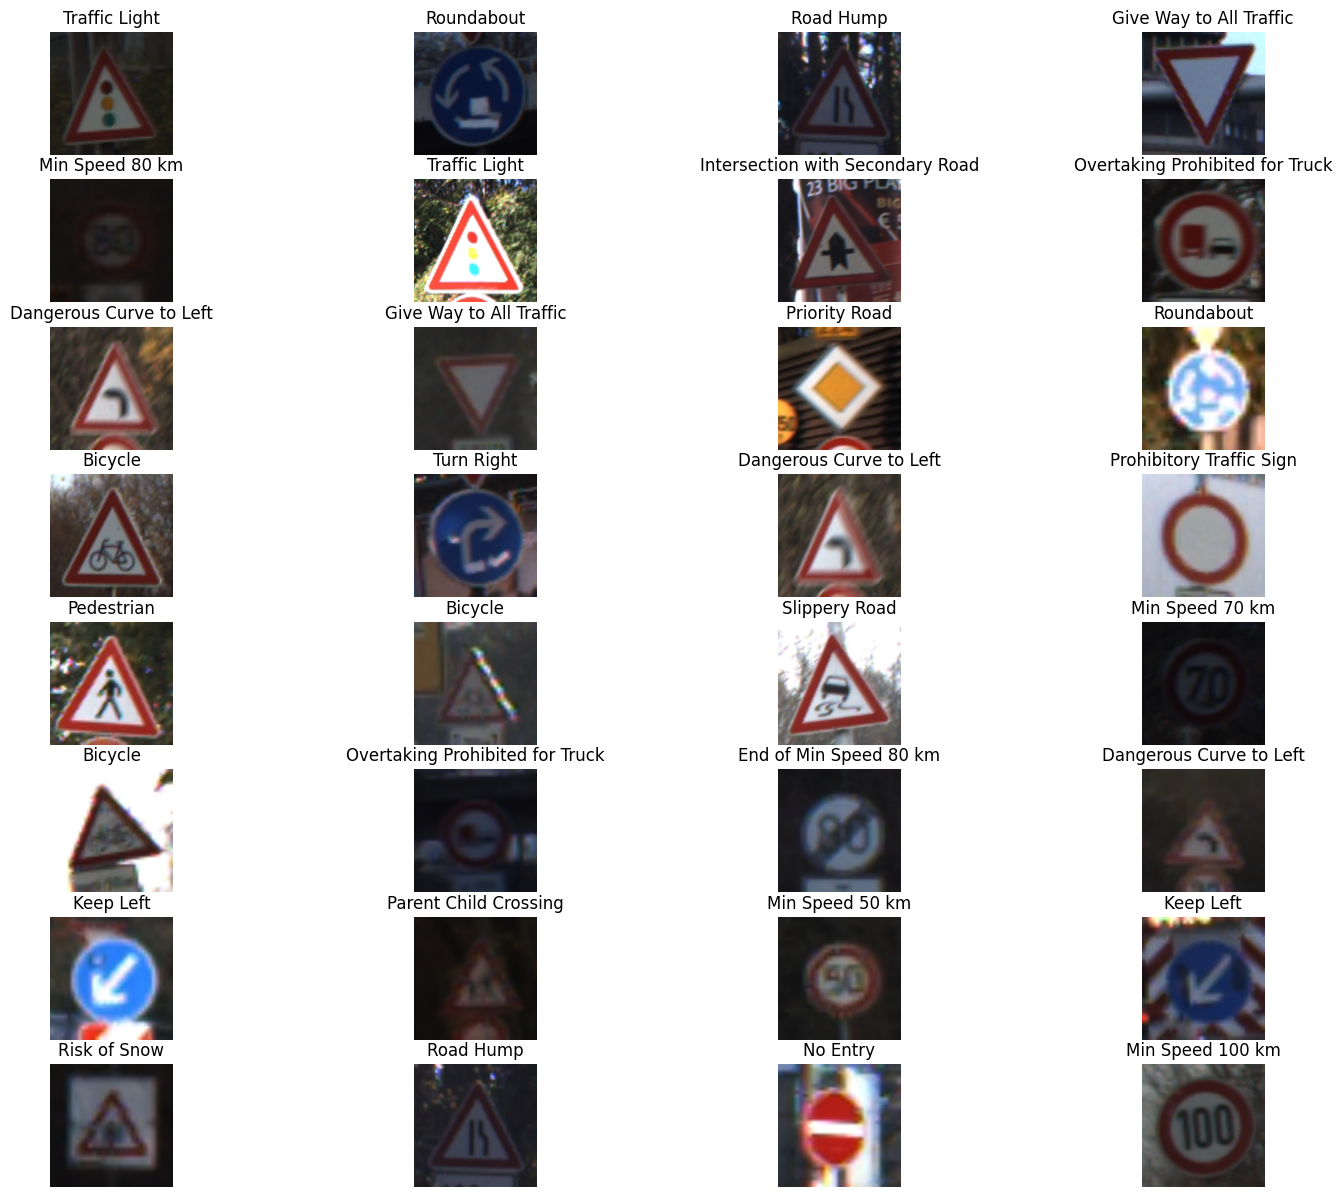

In [13]:
plt.figure(figsize=[18,15])
num_rows=8
num_cols=4
for image_batch, label_batch in train_dataset.take(1):
    for i in range(num_rows*num_cols):
        ax=plt.subplot(num_rows,num_cols,i+1)
        truth_idx = label_batch[i].numpy()
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(mapped_class_names[truth_idx])
        plt.axis("off")

In [14]:
import pandas as pd
input_file = DatasetConfig.DATA_TEST_GT
dataset = pd.read_csv(input_file)
df=pd.DataFrame(dataset)
cols = [6]
df = df[df.columns[cols]]

mapped_class_names = [class_name_mapping[class_name[i]] for i in range(len(class_name))]
class_id_mapping = {k: v for k, v in zip(class_name, mapped_class_names)}
ground_truth = [class_id_mapping[str(x)] for x in df["ClassId"].values.tolist()]
ground_truth_num = df["ClassId"].values.tolist()
print("Total number of Test Labels : {}".format(len(ground_truth)))
print(ground_truth[0:10])
print(ground_truth_num[0:10])

Total number of Test Labels : 12630
['Truck', 'Min Speed 30 km', 'Keep Right', 'Turn Right', 'Intersection with Secondary Road', 'Keep Right', 'Caution Sign', 'Priority Road', 'Road Works Ahead', 'Go Ahead']
[16, 1, 38, 33, 11, 38, 18, 12, 25, 35]


In [15]:
class_name_integer = list(map(int,train_dataset.class_names))
ground_truth_id_cn2idx = dict(zip(class_name_integer, range(0, DatasetConfig.NUM_CLASSES)))
ground_truth_id_cn2idx.items()

dict_items([(0, 0), (1, 1), (10, 2), (11, 3), (12, 4), (13, 5), (14, 6), (15, 7), (16, 8), (17, 9), (18, 10), (19, 11), (2, 12), (20, 13), (21, 14), (22, 15), (23, 16), (24, 17), (25, 18), (26, 19), (27, 20), (28, 21), (29, 22), (3, 23), (30, 24), (31, 25), (32, 26), (33, 27), (34, 28), (35, 29), (36, 30), (37, 31), (38, 32), (39, 33), (4, 34), (40, 35), (41, 36), (42, 37), (5, 38), (6, 39), (7, 40), (8, 41), (9, 42)])

In [16]:
id_label = []
for ids in range (len(ground_truth_num)):
    id_label.append(ground_truth_id_cn2idx[ground_truth_num[ids]])
print("Check Original GT Class ID: {}".format(ground_truth_num[0:10]))
print("New Mapping:{}".format(id_label[0:10]))
print("Check Train Valid Dataset Name:{}".format (train_dataset.class_names))

Check Original GT Class ID: [16, 1, 38, 33, 11, 38, 18, 12, 25, 35]
New Mapping:[8, 1, 32, 27, 3, 32, 10, 4, 18, 29]
Check Train Valid Dataset Name:['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [17]:
import cv2
path_of_images = sorted(glob.glob(DatasetConfig.DATA_ROOT_TEST + os.sep + "*png"))
print(len(path_of_images))
for idx in range(5):
    print(path_of_images[idx])

12630
C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00000.png
C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00001.png
C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00002.png
C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00003.png
C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00004.png


In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices((path_of_images, id_label))

In [19]:
def preprocess_image(image):
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH])
    return image

In [20]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [21]:
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

In [22]:
test_dataset = test_dataset.map(load_and_preprocess_from_path_label)
test_dataset = test_dataset.batch(TrainingConfig.BATCH_SIZE)

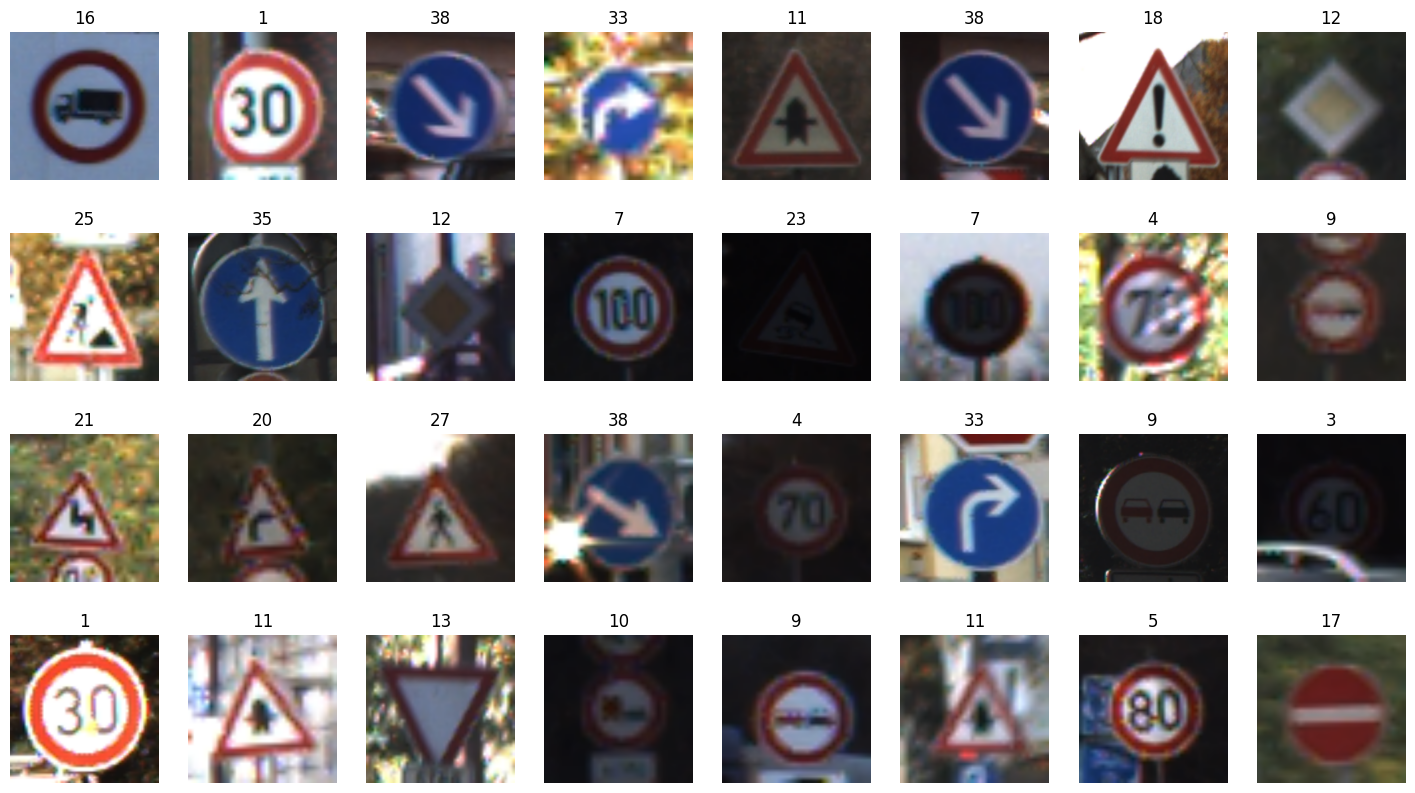

In [23]:
plt.figure(figsize=(18, 10))
num_rows = 4
num_cols = 8
for image_batch, labels_batch in test_dataset.take(1):

    for i in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        truth_idx = labels_batch[i].numpy()
        plt.title(class_name[truth_idx])
        plt.axis("off")

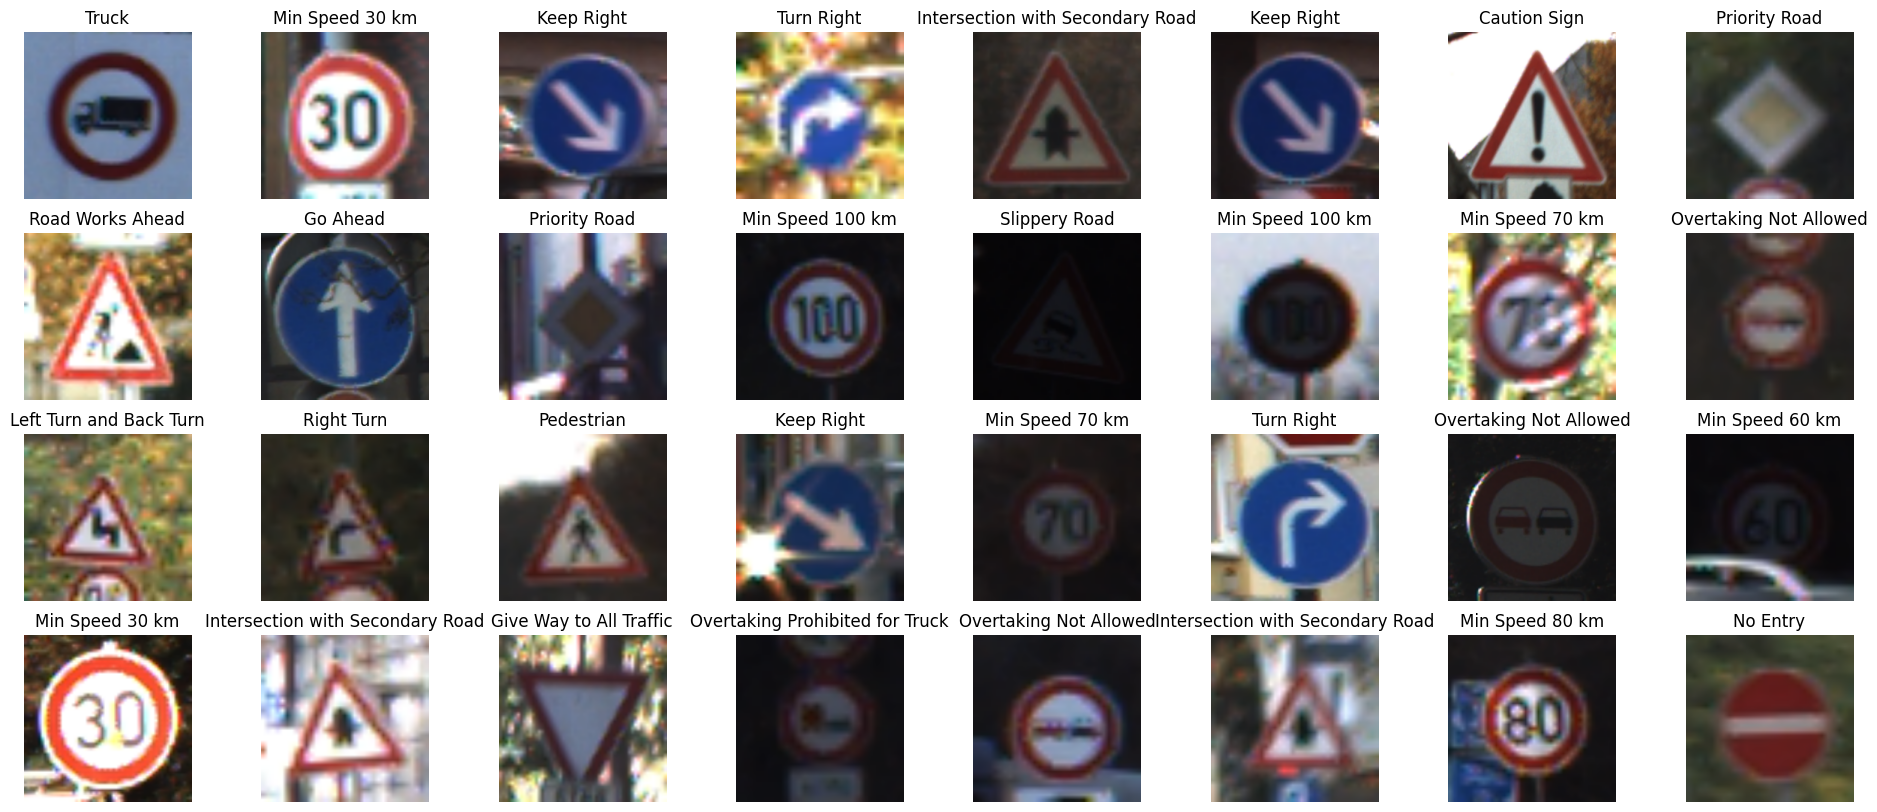

In [24]:
plt.figure(figsize=(24, 10))

num_rows = 4
num_cols = 8

for image_batch, labels_batch in test_dataset.take(1):
    for i in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        truth_idx = labels_batch[i].numpy()
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(mapped_class_names[truth_idx])
        plt.axis("off")

In [25]:
shape_input =(DatasetConfig.IMG_HEIGHT,DatasetConfig.IMG_WIDTH,DatasetConfig.CHANNELS)
VGG16_Conv_Base = tf.keras.applications.vgg16.VGG16(input_shape=shape_input,
                                                    include_top=False,weights = 'imagenet')
VGG16_Conv_Base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
VGG16_Conv_Base.trainable = True
num_layers_fine_tune = TrainingConfig.LAYERS_FINE_TUNE
num_layers = len(VGG16_Conv_Base.layers)

for model_layer in VGG16_Conv_Base.layers[: num_layers - num_layers_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

print(f"Configured to fine tune the last {num_layers_fine_tune} convolutional layers...")
VGG16_Conv_Base.summary()

FREEZING LAYER: <InputLayer name=input_layer, built=True>
FREEZING LAYER: <Conv2D name=block1_conv1, built=True>
FREEZING LAYER: <Conv2D name=block1_conv2, built=True>
FREEZING LAYER: <MaxPooling2D name=block1_pool, built=True>
FREEZING LAYER: <Conv2D name=block2_conv1, built=True>
FREEZING LAYER: <Conv2D name=block2_conv2, built=True>
FREEZING LAYER: <MaxPooling2D name=block2_pool, built=True>
FREEZING LAYER: <Conv2D name=block3_conv1, built=True>
FREEZING LAYER: <Conv2D name=block3_conv2, built=True>
FREEZING LAYER: <Conv2D name=block3_conv3, built=True>
FREEZING LAYER: <MaxPooling2D name=block3_pool, built=True>
Configured to fine tune the last 8 convolutional layers...


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 12,979,200 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [27]:
input_model = tf.keras.Input(shape=shape_input)
x=tf.keras.applications.vgg16.preprocess_input(input_model)
x=VGG16_Conv_Base(x)
x=layers.Flatten()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dropout(TrainingConfig.DROPOUT)(x)
output_model = layers.Dense(DatasetConfig.NUM_CLASSES,activation='softmax')(x)

In [28]:
model_vgg16_finetuned = keras.Model(input_model,output_model)

In [29]:
model_vgg16_finetuned.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  3,211,392 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 43)        │      5,547 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,931,627 (68.40 MB)

 Trainable params: 16,196,139 (61.78 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [32]:
def save_model(model, model_name, patience=20, verbose=1):

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  
        patience=patience,   
        min_delta=0.001,     
        verbose=verbose     
    )

    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_name + '.keras',  
        monitor='val_loss',           
        save_best_only=True,         
        verbose=verbose              
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=TrainingConfig.LEARNING_RATE),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    return early_stopping, model_checkpoint
model=model_vgg16_finetuned
model_name = 'model_vgg16_finetuned_first_experiment'
early_stopping, model_checkpoint = save_model(model, model_name)

training_results = model.fit(train_dataset,
                             epochs=TrainingConfig.EPOCHS,
                             validation_data=valid_dataset,
                             callbacks=[early_stopping, model_checkpoint])

Epoch 1/201
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0225 - loss: 7.7315
Epoch 1: val_loss improved from inf to 3.75452, saving model to model_vgg16_finetuned_first_experiment.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 148s 8s/step - accuracy: 0.0227 - loss: 7.5988 - val_accuracy: 0.0368 - val_loss: 3.7545
Epoch 2/201
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0265 - loss: 3.7421
Epoch 2: val_loss improved from 3.75452 to 3.71687, saving model to model_vgg16_finetuned_first_experiment.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accuracy: 0.0270 - loss: 3.7420 - val_accuracy: 0.0407 - val_loss: 3.7169
Epoch 3/201
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0329 - loss: 3.7069
Epoch 3: val_loss improved from 3.71687 to 3.67138, saving model to model_vgg16_finetuned_first_experiment.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 143s 8s/step - accuracy: 0.0331 - loss: 3.7066 - val_accuracy: 0.0484 - val_loss: 3.6714
Epoch 4/201
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0

In [40]:
def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, 79])
    plt.ylim(ylim)

    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [41]:
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

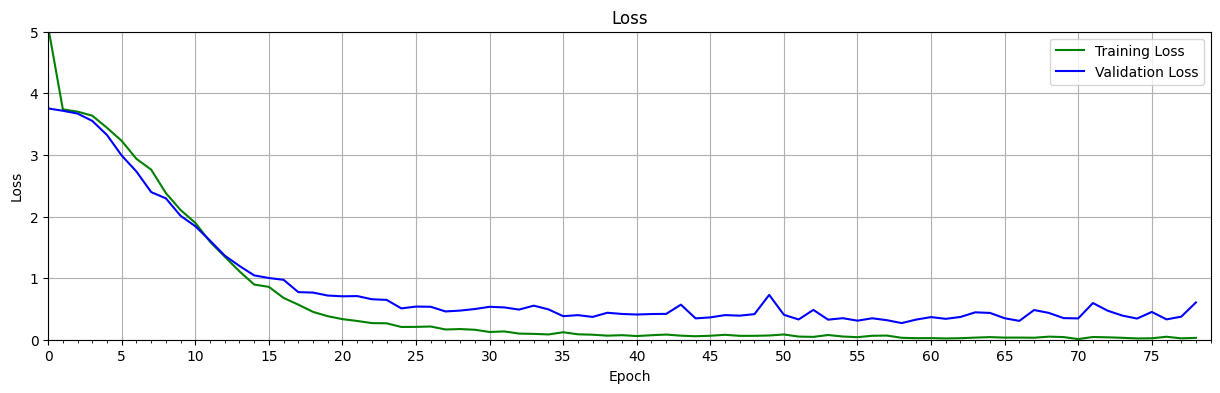

In [42]:
plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

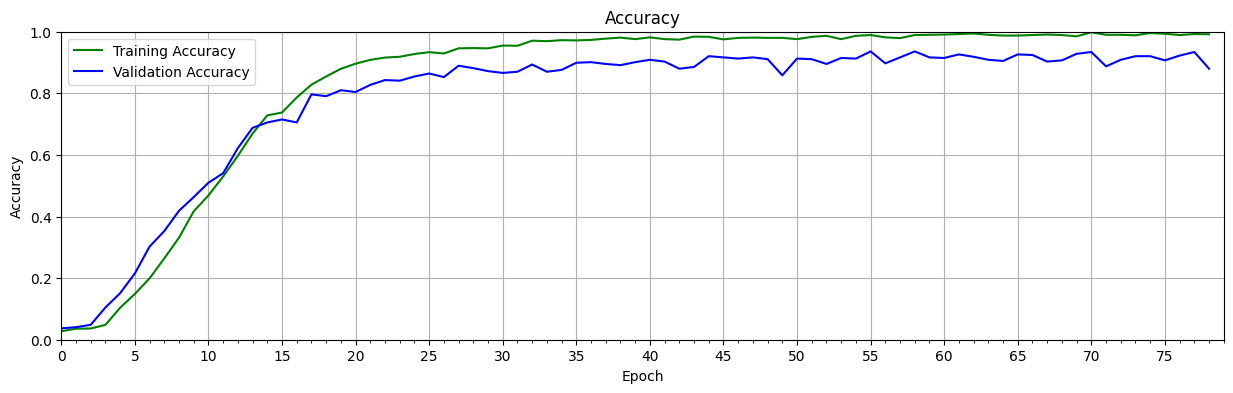

In [43]:
plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [45]:
print(f"Model valid accuracy: {model.evaluate(valid_dataset)[1]*100.:.3f}")
print(f"Model test accuracy: {model.evaluate(test_dataset)[1]*100.:.3f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8719 - loss: 0.6763
Model valid accuracy: 87.984
198/198 ━━━━━━━━━━━━━━━━━━━━ 646s 3s/step - accuracy: 0.9183 - loss: 0.4341
Model test accuracy: 91.718


In [59]:
def display_predictions(dataset, model, class_names):
    plt.figure(figsize=(16, 20))
    num_rows = 8
    num_cols = 4
    jdx = 0

    matched = 0
    wrong = 0
    for image_batch, labels_batch in dataset.take(2):
        print(image_batch.shape)

        predictions = model.predict(image_batch)

        for idx in range(len(labels_batch)):
            pred_idx = tf.argmax(predictions[idx]).numpy()
            truth_idx = labels_batch[idx].numpy()

            if pred_idx == truth_idx:
                color = "g"
                matched += 1
            else:
                color = "r"
                wrong += 1
            jdx += 1

            if jdx > num_rows * num_cols:
                break

            ax = plt.subplot(num_rows, num_cols, jdx)
            title = str(mapped_class_names[truth_idx]) + " : " + str(class_names[pred_idx])

            title_obj = plt.title(title)
            plt.setp(title_obj, color=color)
            plt.axis("off")
            plt.imshow(image_batch[idx].numpy().astype("uint8"))
    print(f"Matched Images: {matched}")
    print(f"Wrong Match Images: {wrong}")
    print(f"Wrong Percentage:",wrong/(matched+wrong)*100,'%')
    return

(64, 224, 224, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
(64, 224, 224, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
Matched Images: 28
Wrong Match Images: 6
Wrong Percentage: 17.647058823529413 %


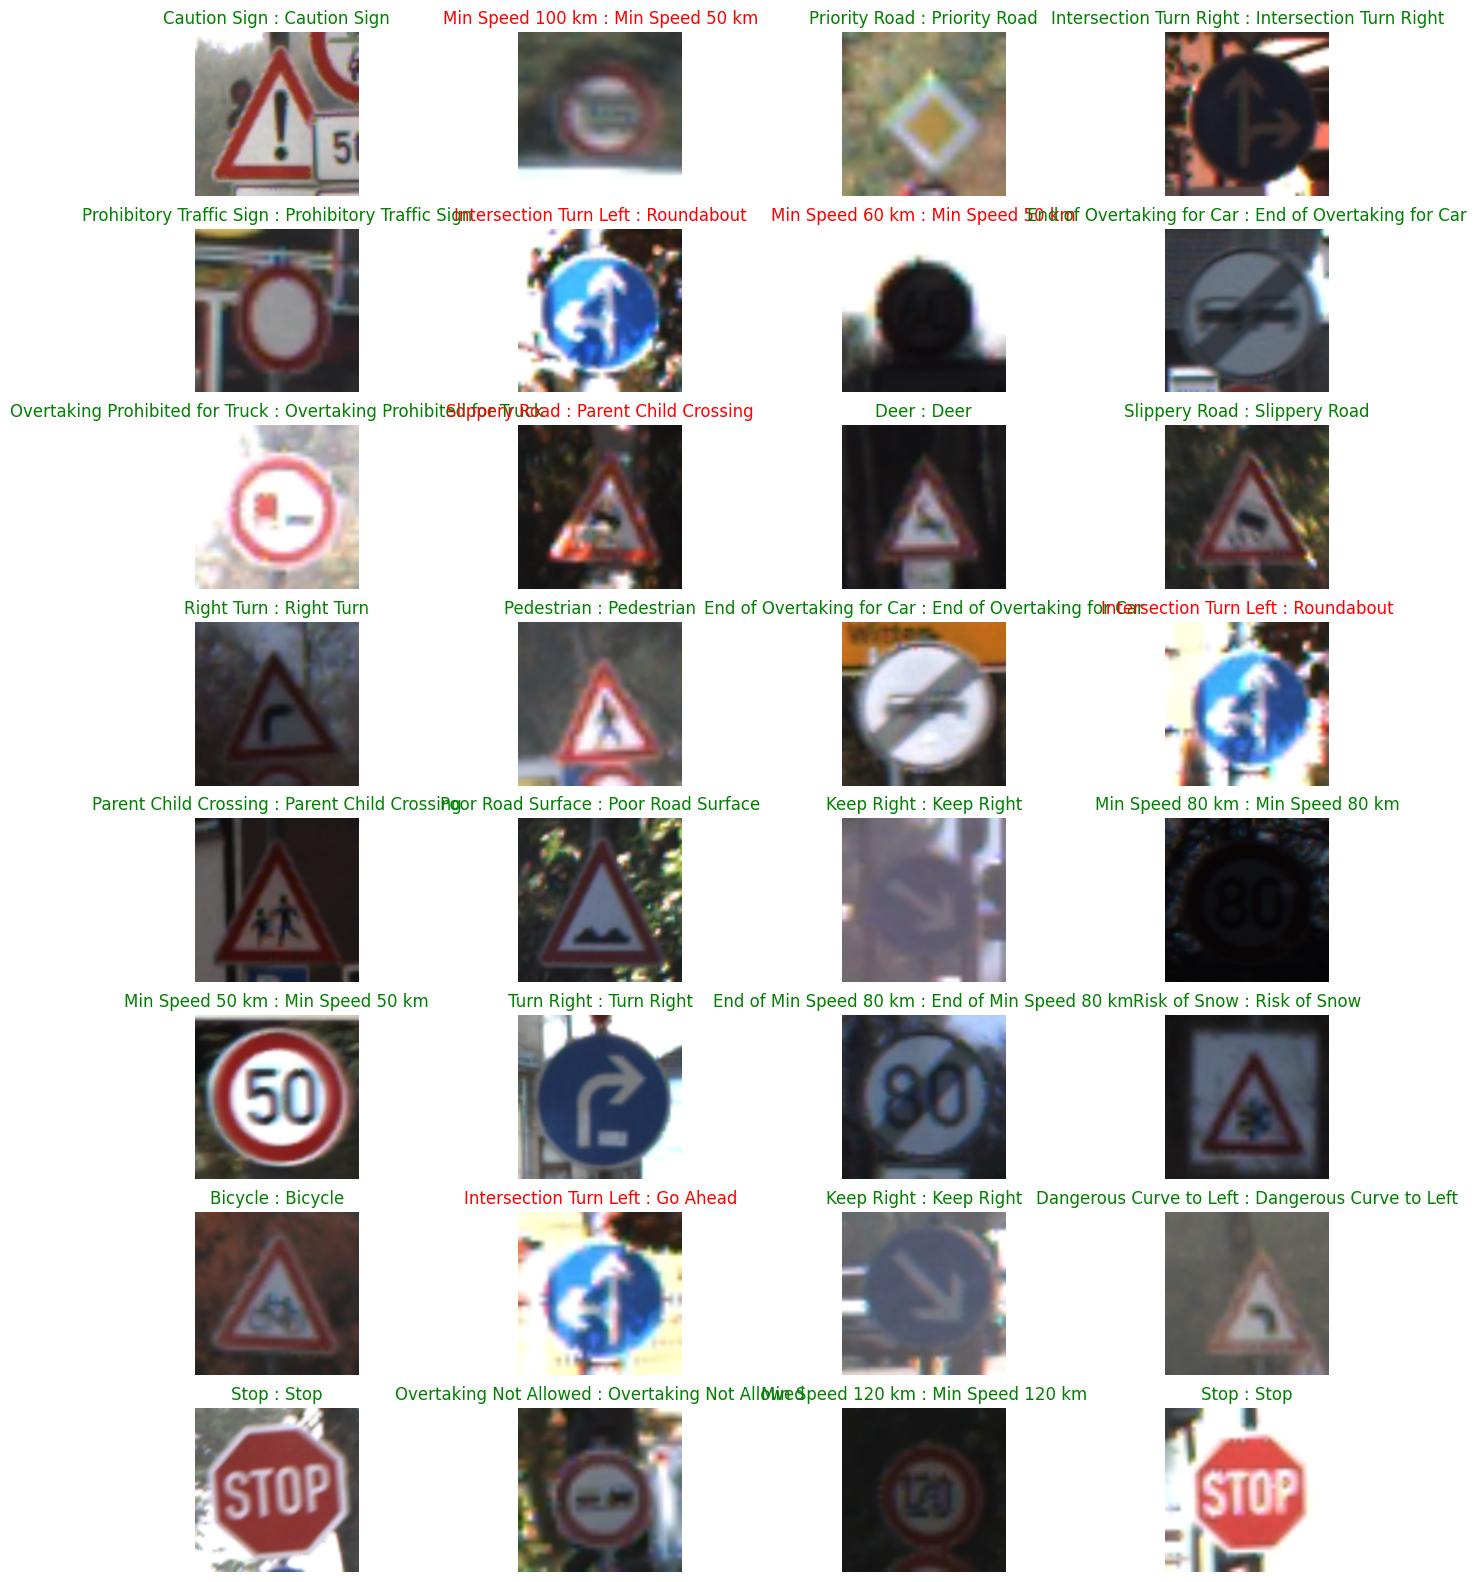

In [60]:
display_predictions(valid_dataset, model, mapped_class_names)

(64, 224, 224, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
(64, 224, 224, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
Matched Images: 33
Wrong Match Images: 1
Wrong Percentage: 2.941176470588235 %


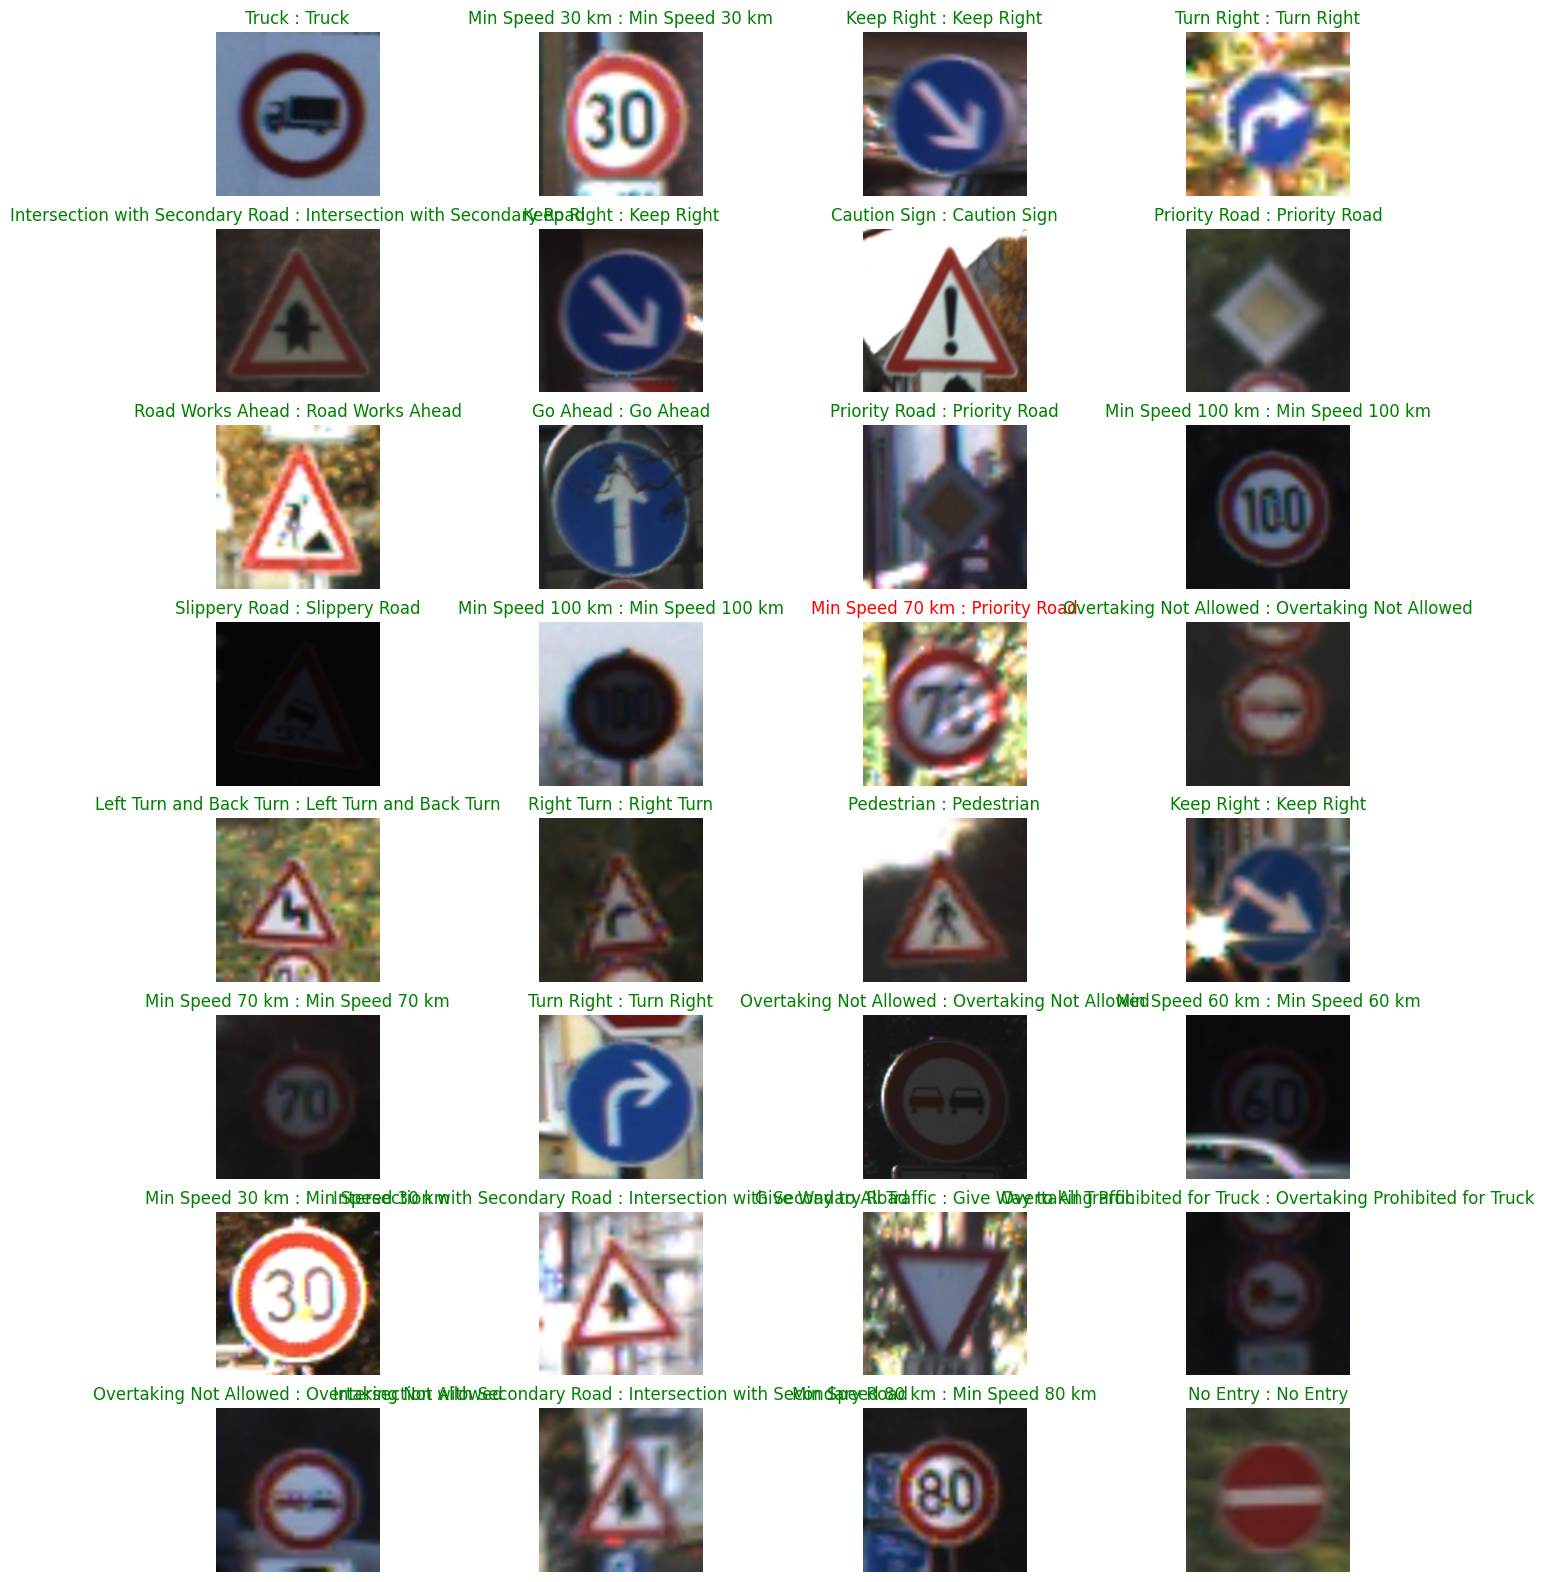

In [61]:
display_predictions(test_dataset, model, mapped_class_names)

In [97]:
import cv2

def predict_single_image(image_path, model, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    image=image[None,...]
    predictions = model.predict(image)
    pred_idx = tf.argmax(predictions[0]).numpy()

    plt.imshow(image[0].astype("uint8"))
    title = str(class_names[pred_idx])
    title_obj = plt.title(title)
    plt.setp(title_obj, color="b") 
    plt.axis("off")
    plt.show()

    print(f"Predicted class: {class_names[pred_idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


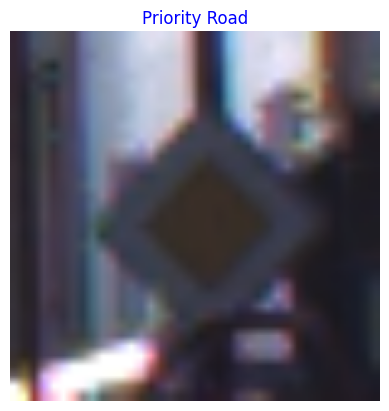

Predicted class: Priority Road


In [98]:
image_path = r"C:\Users\dhika\Downloads\dataset_traffic_signs_40_samples_per_class\dataset_traffic_signs_40_samples_per_class\Test\00010.png"
predict_single_image(image_path, model, mapped_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


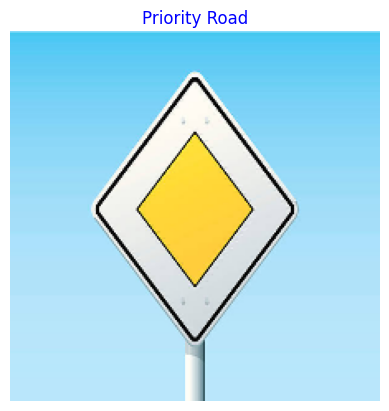

Predicted class: Priority Road


In [100]:
image_path = r"C:\Users\dhika\Downloads\priority_sign_test_random.jpg"
predict_single_image(image_path, model, mapped_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


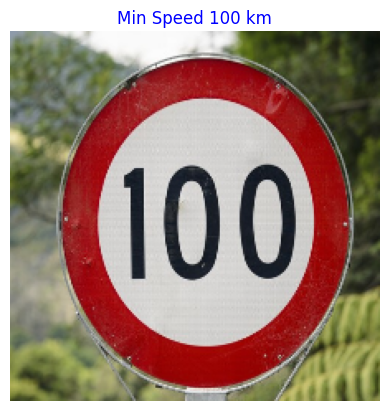

Predicted class: Min Speed 100 km


In [106]:
image_path = r"C:\Users\dhika\Downloads\100_test.jpg"
predict_single_image(image_path, model, mapped_class_names)

In [131]:
import cv2

def predict_live(model, class_names):
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image[None, ...]
        predictions = model.predict(image)
        pred_idx = tf.argmax(predictions[0]).numpy()

        class_name = class_names[pred_idx]

        (h, w) = frame.shape[:2]
        x, y, x_end, y_end = 10, 10, w - 10, h - 10 
        cv2.rectangle(frame, (x, y), (x_end, y_end), (0, 255, 0), 2)
        cv2.putText(frame, class_name, (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.imshow("Road Sign Classification", frame)
        
        plt.figure(figsize=(30,10))
        plt.axis('off')
        plt.imshow(frame)
        plt.show()
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


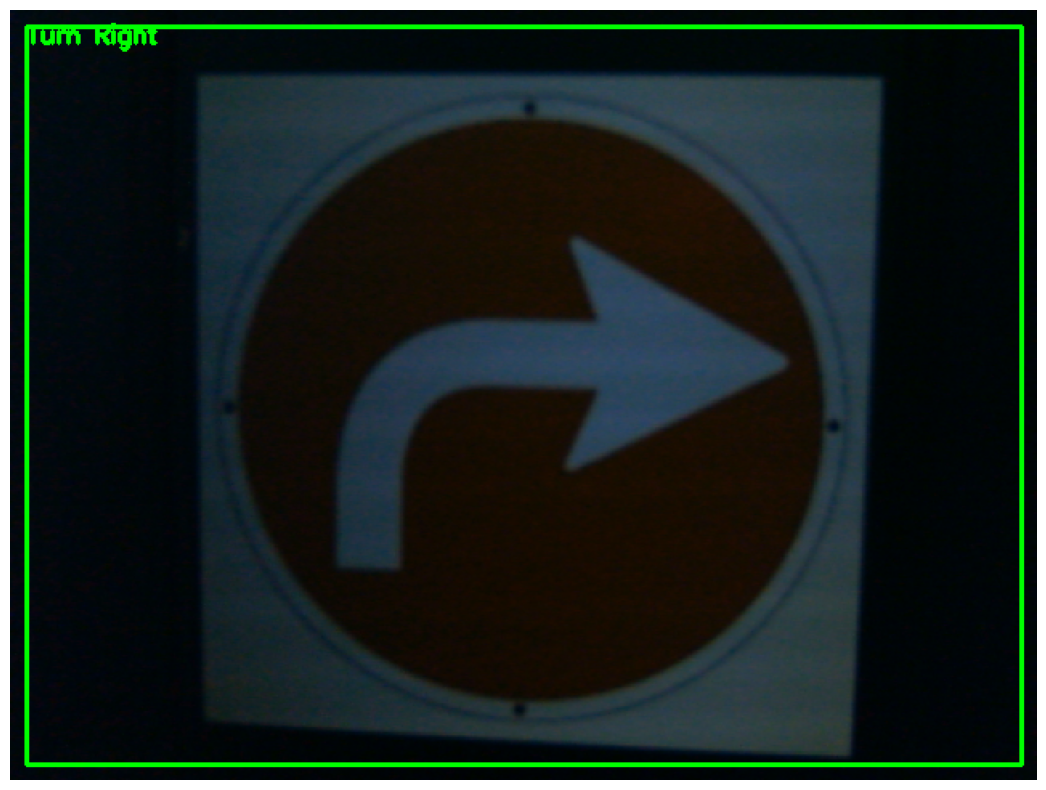

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


KeyboardInterrupt: 

In [134]:
predict_live(model, mapped_class_names)

In [142]:
#Soon improvement added using voice
import pyttsx3

def predict_live_voice(model, class_names):
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Cannot open camera")
        return

    engine = pyttsx3.init()

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image[None, ...]
        predictions = model.predict(image)
        pred_idx = tf.argmax(predictions[0]).numpy()

        class_name = class_names[pred_idx]

        (h, w) = frame.shape[:2]
        x, y, x_end, y_end = 10, 10, w - 10, h - 10 
        cv2.rectangle(frame, (x, y), (x_end, y_end), (0, 255, 0), 2)
        cv2.putText(frame, class_name, (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.imshow("Road Sign Classification", frame)
        
        plt.figure(figsize=(30,10))
        plt.axis('off')
        plt.imshow(frame)
        plt.show()
        
        # Read the result using TTS
        engine.say("The predicted class is: " + class_name)
        engine.runAndWait()

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'pyttsx3'